In [34]:
import os

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base_dir = "rise_loan_data/"
custom_palette = sns.color_palette("Purples", 2)
custom_palette_6 = sns.color_palette("Purples", 6)

In [ ]:
loan=pd.read_csv(base_dir + "loan_data.csv")
loan.head()

In [ ]:
loan.describe()

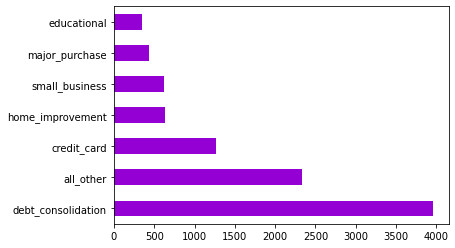

In [43]:
loan['purpose'].value_counts().plot(kind='barh', color = 'darkviolet')

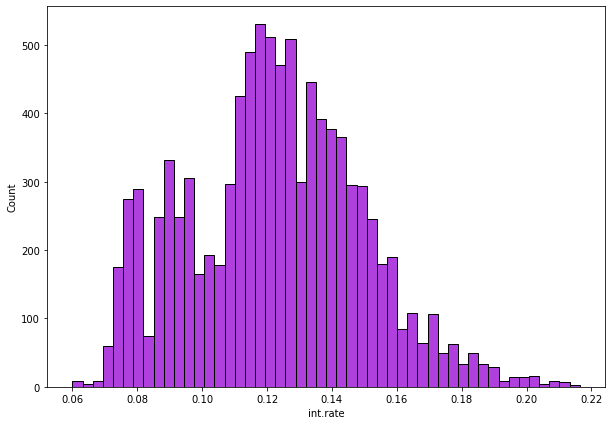

In [51]:
plt.figure(figsize=(10,7))
sns.histplot(loan['int.rate'],bins=50, color = "darkviolet")

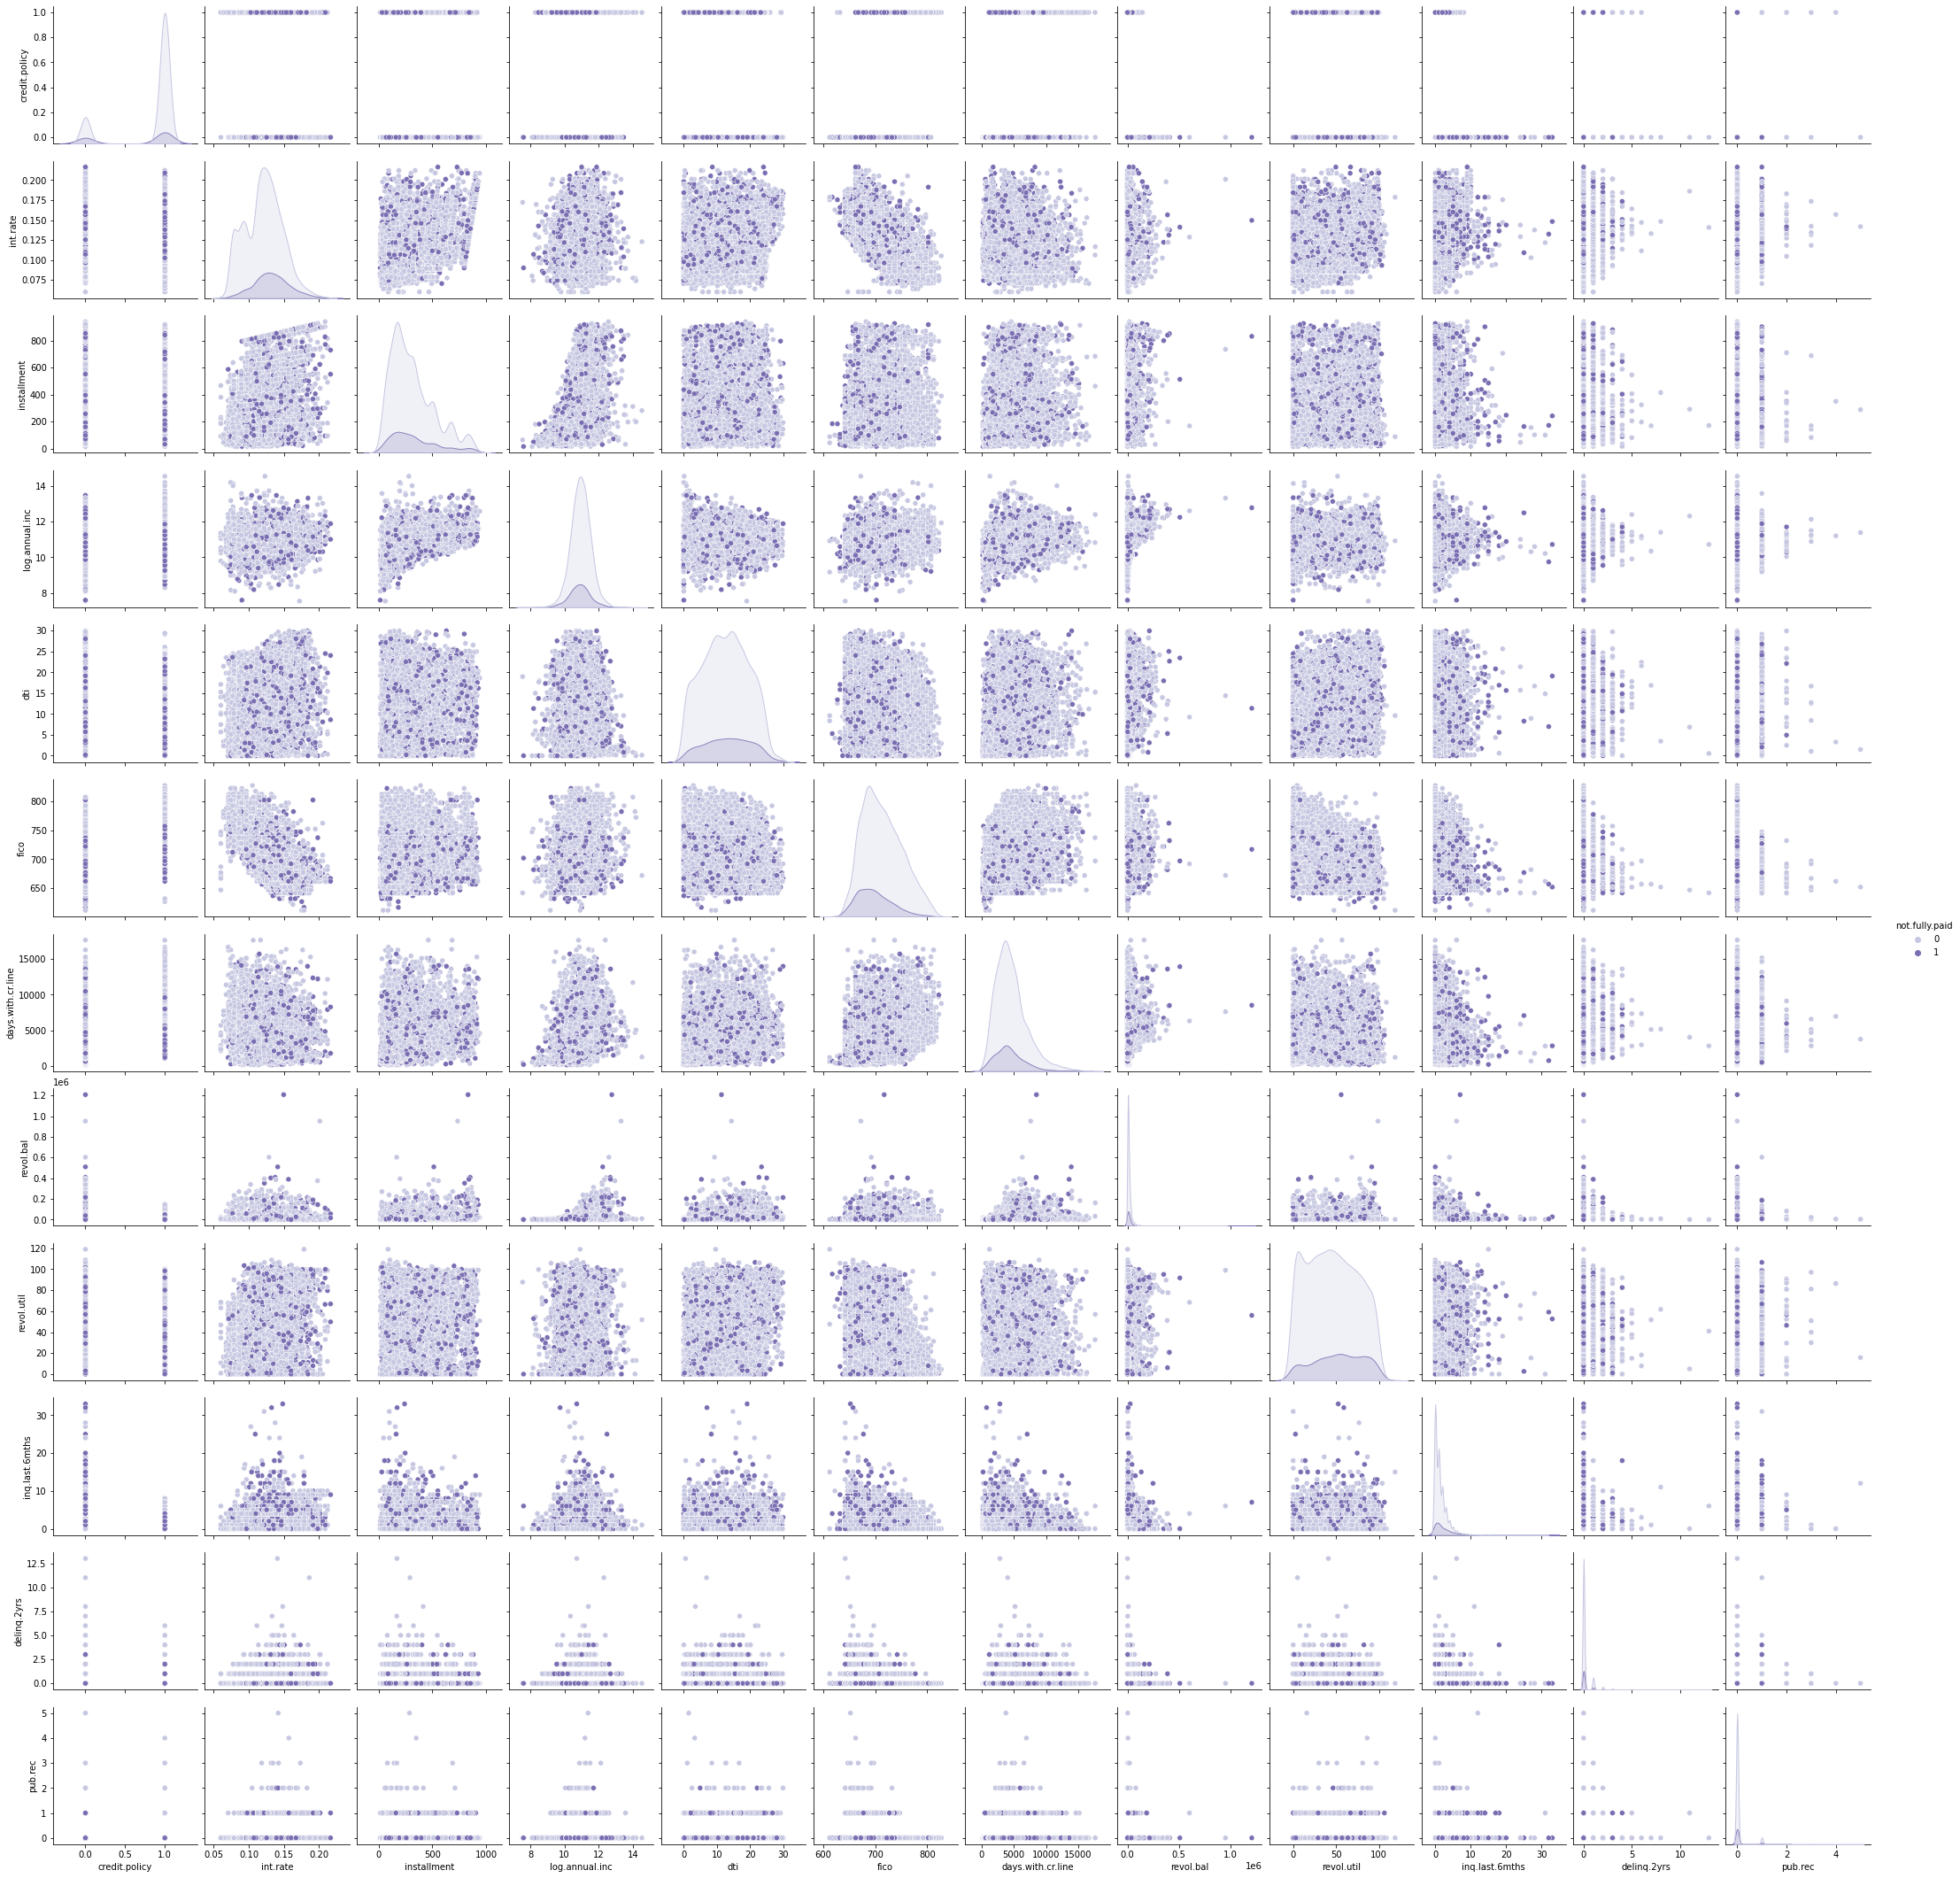

In [32]:

sns.pairplot(loan, hue='not.fully.paid', palette = custom_palette)

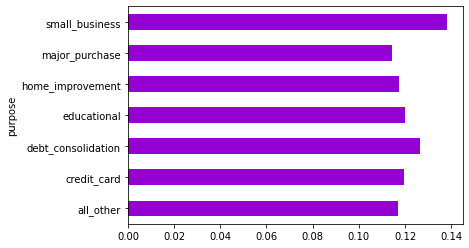

In [54]:
purpose=loan.groupby('purpose')
(purpose['int.rate'].mean()).plot(kind='barh',color='darkviolet')

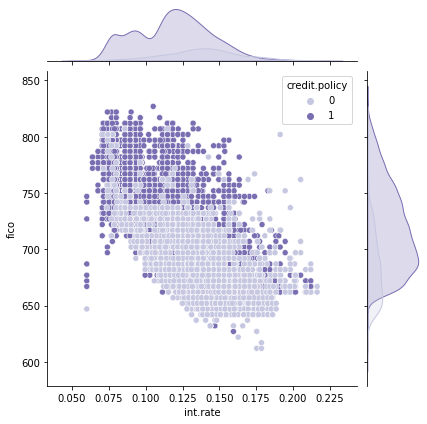

In [56]:
sns.jointplot(data=loan,x='int.rate',y='fico',hue='credit.policy', palette = custom_palette)

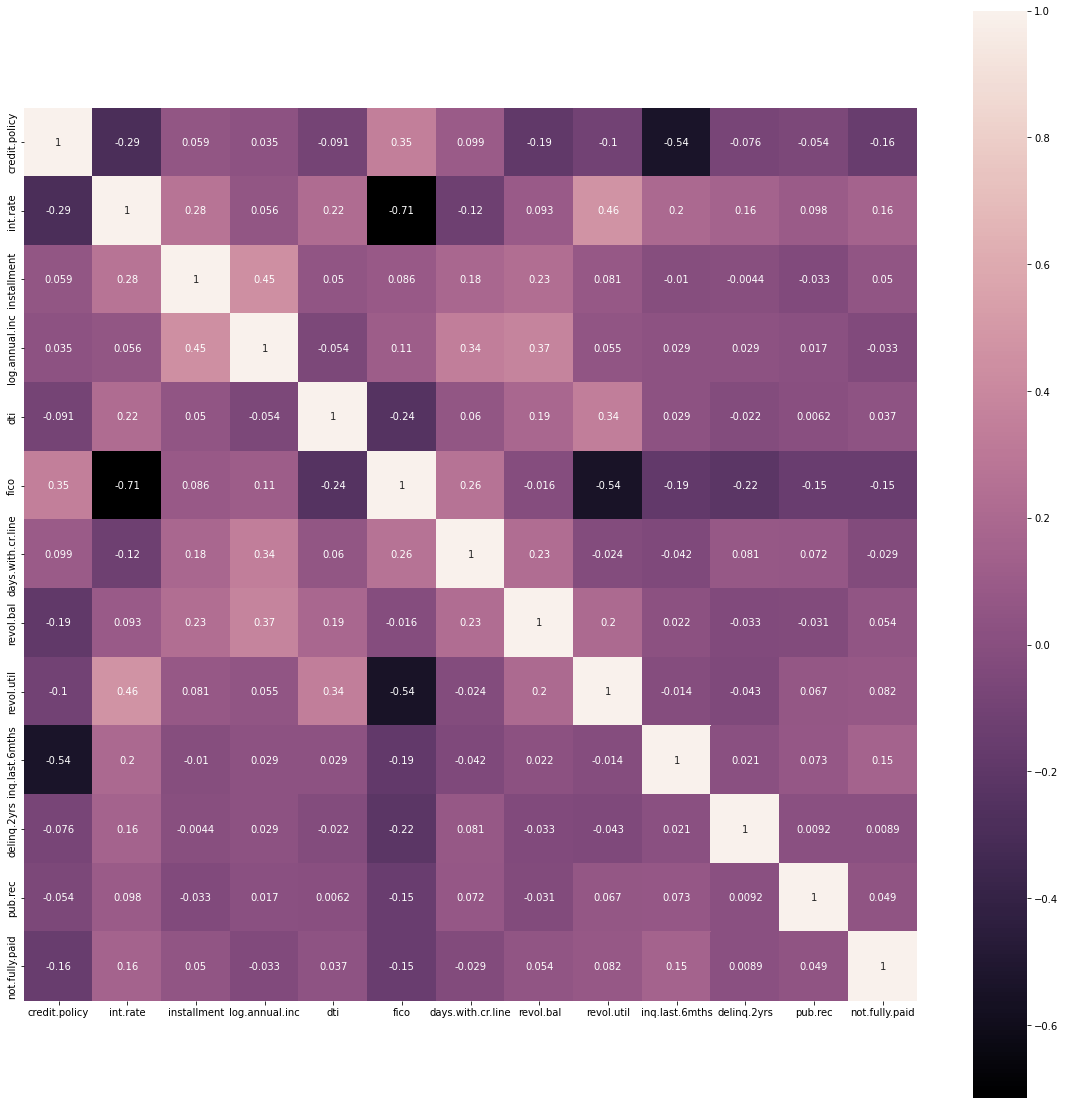

In [65]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num = loan.select_dtypes(include=numerics).columns
plt.figure(figsize=(20,20))
custom_palette_rocket = sns.cubehelix_palette(as_cmap=True, dark=0, light=.95, reverse=True,)
sns.heatmap(loan[num].corr(),annot=True,square=True, cmap = custom_palette_rocket)


In [67]:
from sklearn.model_selection import train_test_split
X=loan.drop(['not.fully.paid','purpose'],axis=1)   # keeping 'purpose' column aside for now in features
y=loan['not.fully.paid']
X.shape

(9578, 12)

In [68]:
loan.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [69]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
features=pd.DataFrame(data=X_scaled,columns=['credit.policy',  'installment', 'log.annual.inc','dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util','inq.last.6mths', 'delinq.2yrs', 'pub.rec','int rate'])

In [70]:
X_train,X_test,y_train,y_test=train_test_split(features,y,test_size=0.25)

In [72]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
pred=logreg.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)
dummy=pd.get_dummies(loan['purpose'],drop_first=True)
df=features.join(dummy)
df

,credit.policy,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,int rate,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,0.492222,-0.139318,2.463099,0.680388,0.998505,0.688825,0.432230,0.353732,0.182704,-0.716989,-0.299730,-0.237003,0,1,0,0,0,0
1,0.492222,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.721230,0.495018,1.030602,-0.716989,-0.299730,-0.237003,1,0,0,0,0,0
2,0.492222,0.486484,0.230708,-0.908659,-0.141885,-0.759742,0.059770,-0.397073,-0.730683,-0.262470,-0.299730,-0.237003,0,1,0,0,0,0
3,0.492222,-0.813544,-0.757022,0.680388,-0.654697,0.030385,-0.745277,0.496321,0.909966,-0.262470,-0.299730,-0.237003,0,1,0,0,0,0
4,0.492222,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.198161,-0.360663,-0.251586,-0.716989,1.531147,-0.237003,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,-2.031603,0.873884,0.123976,2.031030,-0.322023,-1.023118,2.368325,5.879467,1.216726,0.192048,-0.299730,-0.237003,0,0,0,0,0,0
9574,-2.031603,0.099083,-0.296481,0.341170,-1.800898,0.293761,-0.072400,-0.495638,-1.575135,1.555604,-0.299730,-0.237003,0,0,0,0,0,0
9575,-2.031603,-0.578868,-1.068670,-0.545694,0.070213,-0.628054,-0.444860,-0.203765,1.244300,2.919159,-0.299730,-0.237003,0,1,0,0,0,0
9576,-2.031603,1.391660,0.156914,-0.182730,0.954924,-0.496366,-1.105722,-0.501089,-1.502753,1.555604,-0.299730,-0.237003,0,0,0,1,0,0


In [73]:
X=df
y=loan['not.fully.paid']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [74]:
pred=logreg.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.8434237995824635

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


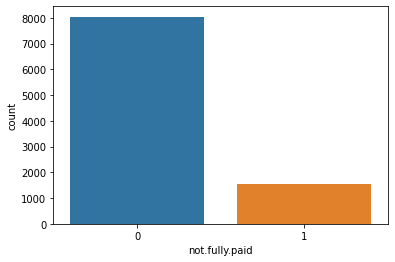

In [75]:
sns.countplot(loan['not.fully.paid'])


applying stratified K fold clustering, because target variable is unbalanced.


In [76]:
from sklearn.model_selection import StratifiedKFold
k=StratifiedKFold()
scaled2=scaler.fit_transform(X)
skf=StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
stratification=[]
for train_index,test_index in skf.split(X,y):
    x_train_fold, x_test_fold = scaled2[train_index], scaled2[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    logreg.fit(x_train_fold, y_train_fold)
    stratification.append(logreg.score(x_test_fold, y_test_fold))
    print(stratification)



[0.8350730688935282]
[0.8350730688935282, 0.8402922755741128]
[0.8350730688935282, 0.8402922755741128, 0.8413361169102297]
[0.8350730688935282, 0.8402922755741128, 0.8413361169102297, 0.8392484342379958]
[0.8350730688935282, 0.8402922755741128, 0.8413361169102297, 0.8392484342379958, 0.8392484342379958]
[0.8350730688935282, 0.8402922755741128, 0.8413361169102297, 0.8392484342379958, 0.8392484342379958, 0.8340292275574113]
[0.8350730688935282, 0.8402922755741128, 0.8413361169102297, 0.8392484342379958, 0.8392484342379958, 0.8340292275574113, 0.8444676409185804]
[0.8350730688935282, 0.8402922755741128, 0.8413361169102297, 0.8392484342379958, 0.8392484342379958, 0.8340292275574113, 0.8444676409185804, 0.8434237995824635]
[0.8350730688935282, 0.8402922755741128, 0.8413361169102297, 0.8392484342379958, 0.8392484342379958, 0.8340292275574113, 0.8444676409185804, 0.8434237995824635, 0.8390804597701149]
[0.8350730688935282, 0.8402922755741128, 0.8413361169102297, 0.8392484342379958, 0.83924843

In [77]:


print('\nMaximum Accuracy That can be obtained from this model is:',
      max(stratification)*100, '%')
print('\nMinimum Accuracy:',
      min(stratification)*100, '%')
print('\nOverall Accuracy:',
      np.mean(stratification)*100, '%')
print('\nStandard Deviation is:', np.std(stratification))




Maximum Accuracy That can be obtained from this model is: 84.44676409185804 %

Minimum Accuracy: 83.40292275574113 %

Overall Accuracy: 83.97369781611376 %

Standard Deviation is: 0.0031004956974886927


In [78]:
scaled_data=features.join(loan['not.fully.paid'])
scaled_data.head(10)

,credit.policy,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,int rate,not.fully.paid
0,0.492222,-0.139318,2.463099,0.680388,0.998505,0.688825,0.432230,0.353732,0.182704,-0.716989,-0.299730,-0.237003,0
1,0.492222,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.721230,0.495018,1.030602,-0.716989,-0.299730,-0.237003,0
2,0.492222,0.486484,0.230708,-0.908659,-0.141885,-0.759742,0.059770,-0.397073,-0.730683,-0.262470,-0.299730,-0.237003,0
3,0.492222,-0.813544,-0.757022,0.680388,-0.654697,0.030385,-0.745277,0.496321,0.909966,-0.262470,-0.299730,-0.237003,0
4,0.492222,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.198161,-0.360663,-0.251586,-0.716989,1.531147,-0.237003,0
5,0.492222,-1.633045,-0.936728,1.582435,0.635324,0.425449,0.624509,1.004106,0.144790,-0.716989,-0.299730,-0.237003,0
6,0.492222,1.004260,-0.604024,-0.354109,-1.250315,-1.154806,-0.552998,-0.387356,1.034049,-0.716989,-0.299730,3.578150,1
7,0.492222,-0.418693,-0.907317,0.113834,-0.221785,0.293761,0.222378,0.216447,0.751416,-0.716989,-0.299730,-0.237003,1
8,0.492222,-0.344193,-1.119960,0.773362,0.674547,-0.759742,-0.229000,1.570017,0.148236,-0.262470,-0.299730,-0.237003,0
9,0.492222,-0.020117,-1.134786,-1.185016,-0.378679,-0.101303,-0.733229,-0.334296,-0.820298,-0.262470,-0.299730,-0.237003,0


In [79]:
from sklearn.model_selection import train_test_split
X=scaled_data.drop('not.fully.paid',axis=1)
y=scaled_data['not.fully.paid']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [80]:
pred=knn.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90      2023
           1       0.27      0.06      0.10       372

    accuracy                           0.83      2395
   macro avg       0.56      0.52      0.50      2395
weighted avg       0.76      0.83      0.78      2395



In [81]:
accuracy_score(y_test,pred)

0.8279749478079332

In [83]:
df2=loan.join(dummy)
df2.drop('purpose',axis=1,inplace=True)

X=df2.drop('not.fully.paid',axis=1)
y=df2['not.fully.paid']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()

rfc.fit(X_train,y_train)



RandomForestClassifier()

In [85]:
pred=rfc.fit(X_train,y_train).predict(X_test)
print(confusion_matrix(y_test,pred))

[[2016    9]
 [ 362    8]]


In [86]:
print(accuracy_score(y_test,pred))

0.8450939457202505
